# 1. Import Libraries and Data

In [36]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from matplotlib.lines import Line2D
plt.style.use('ggplot')

In [37]:
# Turn your project folder path into a string

path = r'/Users/peterreadman/Desktop/Python Projects/CareerFoundry/04-2020 Instacart Basket Analysis/'

In [38]:
# import pickle file

df = pd.read_pickle(os.path.join(path,'02 Data','02b Prepared Data','instacart_analysis_data.pkl'))

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [71]:
df.head()

,Order_ID,User_ID,Order_Number,Orders_day_of_the_week,Order_hour_of_day,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Product_Name,Aisle_ID,Department_ID,Department,Prices,Price_Range_Loc,Busiest_Day,Busiest_Days,Busiest_Period_of_Day,Max_Order,Loyalty_Flag,Mean_Prices,Spending_Flag,Median_Days,Frequency_Flag,Gender,State,Age,Date_Joined,Dependents,Family_Status,Income,Region,Low_Activity,Age_Group,Income_Bracket,Household_Size,Baby,Pet,Day_Shopper,Parent_Profile,Prof_Profile,Profiles
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large,No,No,Weekday,Married with Children,NaN,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large,No,No,Weekday,Married with Children,NaN,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large,No,No,Weekday,Married with Children,NaN,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large,No,No,Weekday,Married with Children,NaN,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,beverages,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No,Young Adult,Low Income,Large,No,No,Weekday,Married with Children,NaN,NaN


In [72]:
df.shape

(30964564, 42)

In [73]:
# Perform value counts on column 'Order_ID'
value_counts = df['Order_ID'].value_counts()

# Display the result
print(value_counts)

1564244    145
790903     137
61355      127
2970392    121
2069920    116
          ... 
1047972      1
1213829      1
1621880      1
2107600      1
156685       1
Name: Order_ID, Length: 3064375, dtype: int64


In [74]:
30964564 - 3064375

27900189

In [76]:
# Group by 'Order_ID' and aggregate columns using various functions
agg_df = df.groupby('Order_ID').agg({'Order_ID': 'count',
                                     'Prices': 'sum',
                                     'User_ID': 'first',
                                     'Order_hour_of_day': 'first',
                                     'Orders_day_of_the_week': 'first',
                                     'Loyalty_Flag': 'first',
                                     'Family_Status': 'first',
                                     'Parent_Profile': 'first',
                                     'Prof_Profile': 'first',
                                     'Income_Bracket': 'first',
                                     'Day_Shopper': 'first'}
                                     )

# Rename the aggregated columns
agg_df.rename(columns={'Order_ID': 'No. Products',
                       'Prices': 'Order Total',
                       'User_ID': 'User_ID',
                       'Order_hour_of_day': 'Hour_of_Order',
                       'Orders_day_of_the_week': 'Day_of_Order'
                       }, inplace=True)


In [77]:
# Display the resulting aggregated DataFrame head
agg_df.head()

,No. Products,Order Total,User_ID,Hour_of_Order,Day_of_Order,Loyalty_Flag,Family_Status,Parent_Profile,Prof_Profile,Income_Bracket,Day_Shopper
Order_ID,,,,,,,,,,,
2,9,91.6,202279,9,5,New customer,married,Married with Children,Mature Professional,Middle Income,Weekday
3,8,70.3,205970,17,5,Regular customer,married,Married with Children,Mature Professional,Upper-Middle Income,Weekday
4,13,92.8,178520,9,1,Loyal customer,married,Married with Children,Senior/Retired Professional,Middle Income,Weekend
5,26,210.7,156122,16,6,Loyal customer,married,Married with Children,Young Professional,Middle Income,Weekday
6,3,27.5,22352,12,1,New customer,married,Married with Children,Young Professional,Middle Income,Weekend


# Business Question 1
The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders

### Visualisations to support insights and recommendations

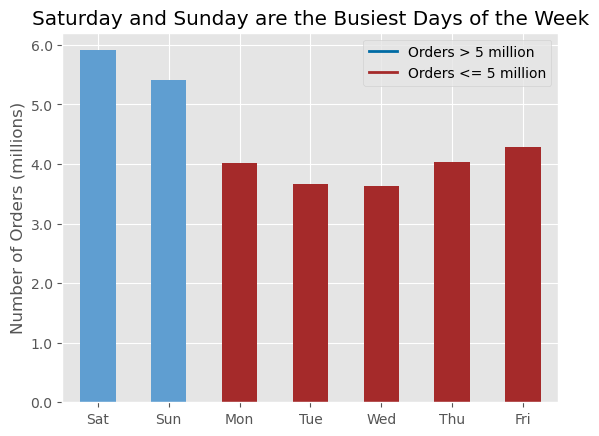

In [80]:
# Bar chart to show the busiest days of the week for the whole of the US
from matplotlib.ticker import FixedLocator, FixedFormatter

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# Create a bar chart with conditional formatting of colors
fig, Orders_per_Day_bar = plt.subplots()
df['Orders_day_of_the_week'].value_counts().sort_index().plot(kind='bar', title='Saturday and Sunday are the Busiest Days of the Week',
                                                         ax=Orders_per_Day_bar, color=[ '#5F9ED1' if freq > 5000000 else 'brown' for freq in df['Orders_day_of_the_week'].value_counts().sort_index()])

# use millions_formatter from FuncFormatter to format Number of Orders as millions
Orders_per_Day_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

Orders_per_Day_bar.set_xlabel('')
Orders_per_Day_bar.set_ylabel('Number of Orders (millions)')

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
Orders_per_Day_bar.set_xticks(range(7))  # Set tick locations
Orders_per_Day_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
Orders_per_Day_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
Orders_per_Day_bar.xaxis.set_major_locator(loc)
Orders_per_Day_bar.xaxis.set_major_formatter(fmt)

# Add a legend
legend_handles = [Line2D([0], [0], color='#006BA4', lw=2, label='Orders > 2 million'),
                  Line2D([0], [0], color='brown', lw=2, label='Orders <= 2 million')]
legend_labels = ['Orders > 5 million', 'Orders <= 5 million']

# Add the custom legend handles and labels
Orders_per_Day_bar.legend(handles=legend_handles, labels=legend_labels)

plt.show()



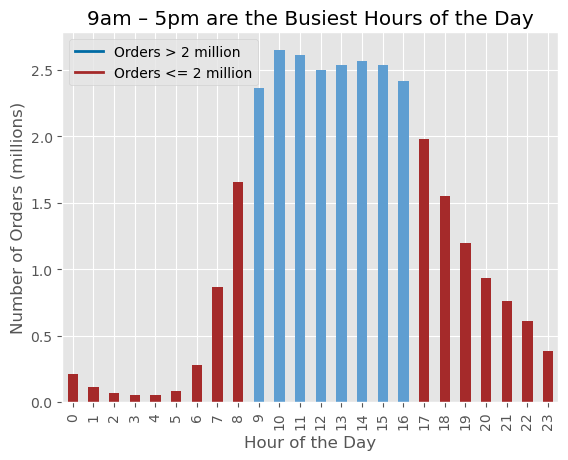

In [78]:
# Create a bar chart - frequency of 'Order_hour_of_day'

from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# Create a bar chart with conditional formatting of colors
fig, Orders_per_Hour_bar = plt.subplots()
df['Order_hour_of_day'].value_counts().sort_index().plot(kind='bar', title='9am – 5pm are the Busiest Hours of the Day',
                                                         ax=Orders_per_Hour_bar, color=[ '#5F9ED1' if freq > 2000000 else 'brown' for freq in df['Order_hour_of_day'].value_counts().sort_index()])

# use millions_formatter from FuncFormatter to format Number of Orders as millions
Orders_per_Hour_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

Orders_per_Hour_bar.set_xlabel('Hour of the Day')
Orders_per_Hour_bar.set_ylabel('Number of Orders (millions)')

# Add a legend
legend_handles = [Line2D([0], [0], color='#006BA4', lw=2, label='Orders > 2 million'),
                  Line2D([0], [0], color='brown', lw=2, label='Orders <= 2 million')]
legend_labels = ['Orders > 2 million', 'Orders <= 2 million']

# Add the custom legend handles and labels
Orders_per_Hour_bar.legend(handles=legend_handles, labels=legend_labels)

plt.show()



In [81]:
# export charts for Question 1

# export Orders_per_Day_bar
Orders_per_Day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_per_Day_bar.png'))

# export Orders_per_Hour_bar
Orders_per_Hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_per_Hour_bar.png'))




In [82]:
# set the seed.
# This seed represents a random but reproducible pattern,
# ie Python will always return the same set of random numbers
# (in this case, seed '4') Important for other analysts to recreate the same set (sample)

np.random.rand(4)

# Create a list holding True/False values to the test np.random.rand() <= 0.7 (70%)

dev = np.random.rand(len(df)) <= 0.7

In [83]:
# Store 70% of the sample in the dataframe 'big'

big = df[dev]

# Store 30% of the sample in the dataframe 'small'

small = df[~dev]

In [84]:
# Check both 'samples' total 100% 

len(df)

30964564

In [85]:
len(big) + len(small)

30964564

# Business Question 2
They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times

In [86]:
# Reduce samples to only columns necessary for the chart

df_2 = small[['Orders_day_of_the_week', 'Prices']]

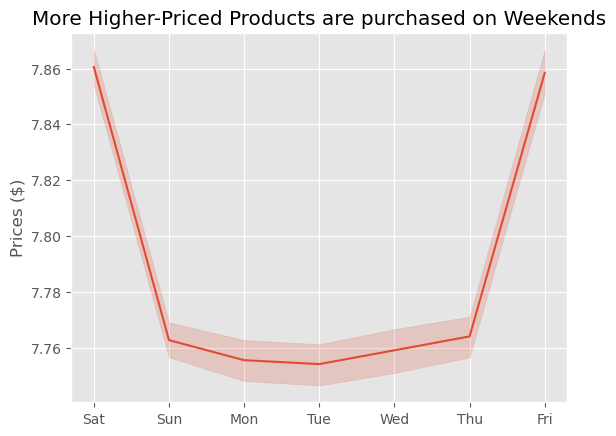

In [87]:
# Create a line chart of 'Orders_day_of_the_week' vs 'Prices'

from matplotlib.ticker import FixedLocator, FixedFormatter

orders_day_of_week_line = sns.lineplot(
        data = df_2,
        x = 'Orders_day_of_the_week',
        y = 'Prices')

# set title and axis labels
orders_day_of_week_line.set_title("More Higher-Priced Products are purchased on Weekends")
orders_day_of_week_line.set_xlabel('')
orders_day_of_week_line.set_ylabel("Prices ($)")

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
orders_day_of_week_line.set_xticks(range(7))  # Set tick locations
orders_day_of_week_line.set_xticklabels(day_labels)  # Set tick labels

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
orders_day_of_week_line.xaxis.set_major_locator(loc)
orders_day_of_week_line.xaxis.set_major_formatter(fmt)

# Show the plot
plt.show()

## Line chart for prices vs hour of the day

In [88]:
# Use sample as created above: 'Big' and 'Small' samples (70% and 30%)
# Reduce samples to only columns necessary for the chart

df_3 = small[['Order_hour_of_day', 'Prices']]

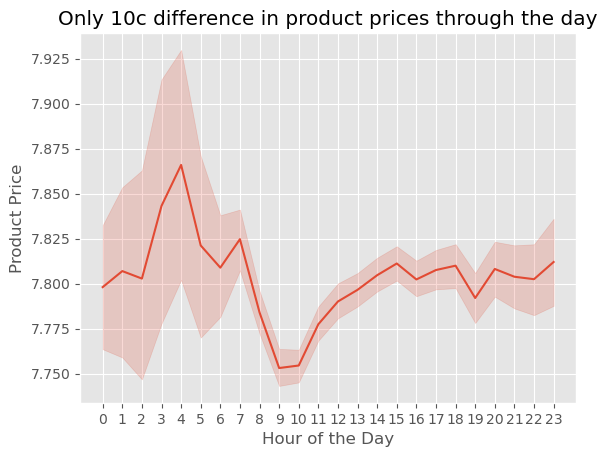

In [89]:
# Create a line chart of 'Order_hour_of_day' vs 'Prices'
prices_vs_hour_line = sns.lineplot(
        data = df_3,
        x = 'Order_hour_of_day',
        y = 'Prices')

# Set title and axis labels
prices_vs_hour_line.set_title("Only 10c difference in product prices through the day")
prices_vs_hour_line.set_xlabel("Hour of the Day")
prices_vs_hour_line.set_ylabel("Product Price")

# Set tick mark interval on x-axis
prices_vs_hour_line.set_xticks(range(0, 24, 1))  # Set tick mark every 2 hours

# Show the plot
plt.show()

In [90]:
# Display the resulting aggregated DataFrame head
agg_df.head()

,No. Products,Order Total,User_ID,Hour_of_Order,Day_of_Order,Loyalty_Flag,Family_Status,Parent_Profile,Prof_Profile,Income_Bracket,Day_Shopper
Order_ID,,,,,,,,,,,
2,9,91.6,202279,9,5,New customer,married,Married with Children,Mature Professional,Middle Income,Weekday
3,8,70.3,205970,17,5,Regular customer,married,Married with Children,Mature Professional,Upper-Middle Income,Weekday
4,13,92.8,178520,9,1,Loyal customer,married,Married with Children,Senior/Retired Professional,Middle Income,Weekend
5,26,210.7,156122,16,6,Loyal customer,married,Married with Children,Young Professional,Middle Income,Weekday
6,3,27.5,22352,12,1,New customer,married,Married with Children,Young Professional,Middle Income,Weekend


In [91]:
agg_df['Order Total'].agg('mean')

78.70911216807193

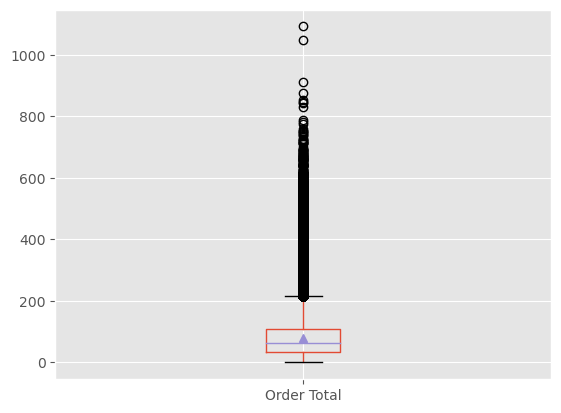

In [94]:
ax_box = agg_df.boxplot(column=['Order Total'], showmeans=True, showfliers=True)

In [96]:
agg_df_order_hour = agg_df[['Hour_of_Order', 'Order Total']]

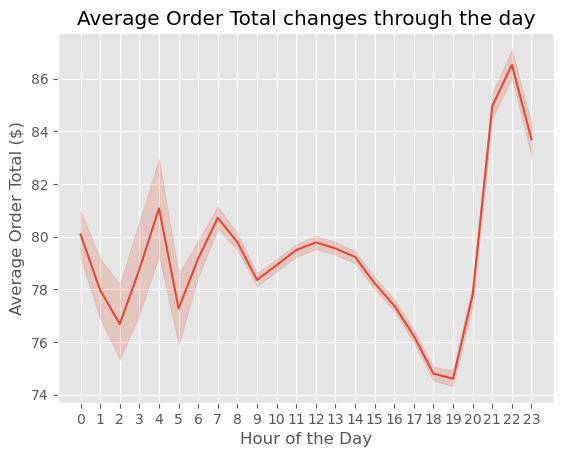

In [97]:
# Create a line chart of 'Hour_of_Order' vs 'Order Total'
orderTotal_vs_hour_line = sns.lineplot(
        data = agg_df_order_hour,
        x = 'Hour_of_Order',
        y = 'Order Total')

# Set title and axis labels
orderTotal_vs_hour_line.set_title("Average Order Total changes through the day")
orderTotal_vs_hour_line.set_xlabel("Hour of the Day")
orderTotal_vs_hour_line.set_ylabel("Average Order Total ($)")

# Set tick mark interval on x-axis
orderTotal_vs_hour_line.set_xticks(range(0, 24, 1))  # Set tick mark every 2 hours

# Show the plot
plt.show()

In [98]:
# Export Line charts

#Export orders_day_of_week_line
orders_day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_Day_of_Week_line.png'))

#Export orders_day_of_week_line
prices_vs_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Prices_vs_Hour_line.png'))

#Export orders_day_of_week_line
orderTotal_vs_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orderTotal_vs_hour_line.png'))

In [99]:
# Create new dataframe grouped on 'Hour of the Day' to explore aggregations of each order

# Order_ID, User_ID, Total of order (Prices), Order_Number, Loyalty, Houseshold_size, Region

agg_df_order_hour_avg = agg_df_order_hour.groupby('Hour_of_Order').agg({'Order Total': 'mean'}).sort_values(by=['Hour_of_Order'], ascending=True)

agg_df_order_hour_avg

,Order Total
Hour_of_Order,
0,80.085136
1,77.964064
2,76.680715
3,78.758433
4,81.078570
5,77.270119
6,79.167553
7,80.714793
8,79.789589


# Business Question 3
Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0, 0.5, 'Frequency (Millions)')

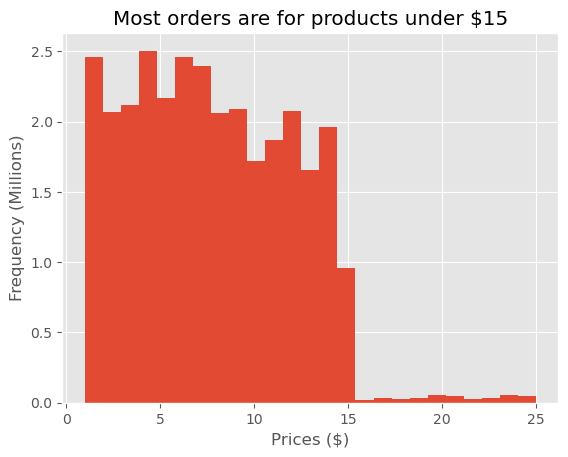

In [101]:
# Distribution of 'Prices'

Prices_hist = df['Prices'].plot(kind='hist', bins = 25, title='Prices')
# use millions_formatter from FuncFormatter to format Number of Orders as millions
Prices_hist.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

Prices_hist.set_title('Most orders are for products under $15')
Prices_hist.set_xlabel('Prices ($)')
Prices_hist.set_ylabel('Frequency (Millions)')


In [102]:
# Export 'Prices_histogram'

Prices_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Prices_histogram.png'))

In [103]:
df.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Orders_day_of_the_week',
       'Order_hour_of_day', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Department', 'Prices', 'Price_Range_Loc',
       'Busiest_Day', 'Busiest_Days', 'Busiest_Period_of_Day', 'Max_Order',
       'Loyalty_Flag', 'Mean_Prices', 'Spending_Flag', 'Median_Days',
       'Frequency_Flag', 'Gender', 'State', 'Age', 'Date_Joined', 'Dependents',
       'Family_Status', 'Income', 'Region', 'Low_Activity', 'Age_Group',
       'Income_Bracket', 'Household_Size', 'Baby', 'Pet', 'Day_Shopper',
       'Parent_Profile', 'Prof_Profile', 'Profiles'],
      dtype='object')

In [104]:
# Table of product price ranges by department:

prices_dept_agg = df.groupby('Department').agg({'Prices': ['mean', 'min', 'max']})

In [107]:
prices_dept_agg

Prices           
                      mean  min   max
Department                           
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.336372  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733725  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

In [108]:
# export prices_dept_agg as csv
prices_dept_agg.to_csv((os.path.join(path, '02 Data', '02b Prepared Data', 'prices_dept_agg.csv')))

## Explore which products are over 15

In [109]:
# New dataframe to see Product_Name, Department, Prices for 'Low-range product'
lowrange = df[df['Price_Range_Loc'] == 'Low-range product'][['Product_Name', 'Department', 'Prices', 'Price_Range_Loc']]

In [110]:
# Get the count of distinct values in the 'Product_Name' column
low_distinct_count = lowrange['Product_Name'].nunique()

# Display the result
print("Distinct count of Low-range Products: ", low_distinct_count)

Distinct count of Low-range Products:  16280


In [111]:
# New dataframe to see Product_Name, Department, Prices for 'Mid-range product'
midrange = df[df['Price_Range_Loc'] == 'Mid-range product'][['Product_Name', 'Department', 'Prices', 'Price_Range_Loc']]

In [112]:
# Get the count of distinct values in the 'Product_Name' column
mid_distinct_count = midrange['Product_Name'].nunique()

# Display the result
print("Distinct count of Mid-range Producs: ", mid_distinct_count)

Distinct count of Mid-range Producs:  32803


In [113]:
# New dataframe to see Product_Name, Department, Prices for 'High-range product'
highrange = df[df['Price_Range_Loc'] == 'High-range product'][['Product_Name', 'Department', 'Prices', 'Price_Range_Loc']]

### Results
- Low-range products: 16,280
- Mid-range products: 32,803
- High-range products:   547

In [114]:
16280+32803+547

49630

In [115]:
49630-547

49083

In [116]:
49083/49630

0.9889784404593995

In [117]:
# Get the count of distinct values in the 'Product_Name' column
high_distinct_count = highrange['Product_Name'].nunique()

# Display the result
print("Distinct count of High-range Products: ", high_distinct_count)

Distinct count of High-range Products:  547


In [118]:
# Get the count of distinct Product_Name values for each combination of Department and Price_Range_Loc
product_counts = df.groupby(['Department', 'Price_Range_Loc',])['Product_Name'].nunique().unstack().fillna(0)

# Format the counts as whole numbers
product_counts = product_counts.astype(int)

In [119]:
product_counts

Price_Range_Loc,High-range product,Low-range product,Mid-range product
Department,,,
alcohol,0,294,757
babies,0,299,781
bakery,0,417,1098
beverages,0,1257,3103
breakfast,0,332,781
bulk,0,6,32
canned goods,0,592,1499
dairy eggs,2,986,2454
deli,0,396,924


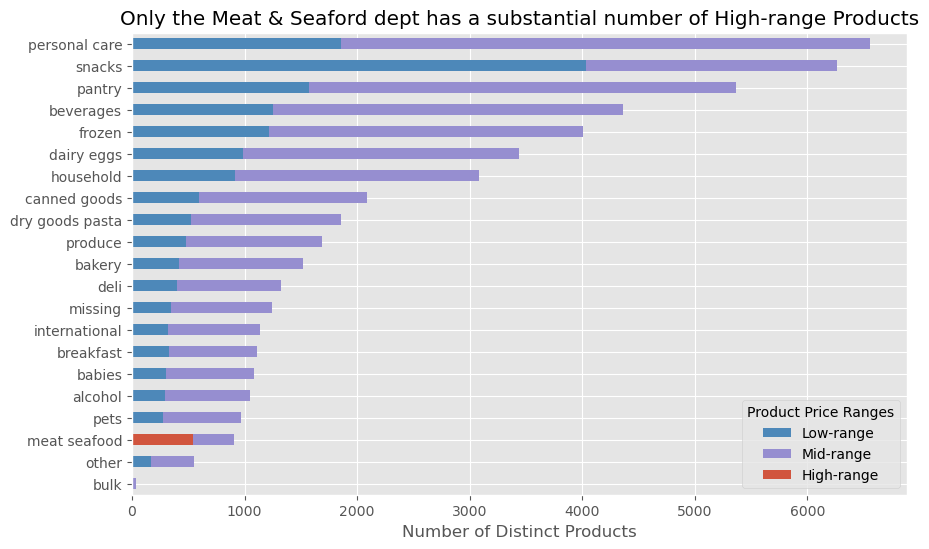

In [120]:
# Define custom colors and labels
colors = ['#D1553E', '#4D88B9', '#968ED0']  # Example colors, replace with your own
labels = ['High-range', 'Low-range', 'Mid-range']
new_labels = ['Low-range', 'Mid-range', 'High-range']  # Desired order of labels

# Add a new column to the dataframe containing the sum of 'High-range product', 'Medium-range product', and 'Low-range product'
product_counts['total'] = product_counts.sum(axis=1)

# Sort the dataframe by the values in the 'total' column in descending order
product_counts = product_counts.sort_values(by='total', ascending=True)

# Remove the 'total' column to avoid it being included in the plot
product_counts = product_counts.drop(columns=['total'])

# Create stacked bar chart
depts_price_ranges = product_counts.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0, color=colors)

# Add labels and title
depts_price_ranges.set_xlabel('Number of Distinct Products')
depts_price_ranges.set_ylabel('')
depts_price_ranges.set_title('Only the Meat & Seaford dept has a substantial number of High-range Products')

# Add legend with reordered labels
handles, _ = depts_price_ranges.get_legend_handles_labels()
new_handles = [handles[labels.index(l)] for l in new_labels]
depts_price_ranges.legend(handles=new_handles, labels=new_labels, title='Product Price Ranges')

# Display the bar chart
plt.show()


In [121]:
# Export products and price-ranges stacked bar
depts_price_ranges.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_price_ranges.png'))

In [122]:
# Get the count of High-range, Low-range and Mid-range products ordered from each department
df.groupby(['Department', 'Price_Range_Loc'])['Price_Range_Loc'].count().unstack().fillna(0)

Price_Range_Loc,High-range product,Low-range product,Mid-range product
Department,,,
alcohol,0.0,33046.0,111581.0
babies,0.0,121484.0,288908.0
bakery,0.0,274986.0,845842.0
beverages,0.0,814697.0,1757204.0
breakfast,0.0,209185.0,461665.0
bulk,0.0,1181.0,32270.0
canned goods,0.0,281711.0,730363.0
dairy eggs,4877.0,1370908.0,3801397.0
deli,0.0,299220.0,704614.0


In [123]:
# Create a crosstab to compare Price-ranges with Department

crosstab_Price_Range_Dept = pd.crosstab(df['Department'], df['Price_Range_Loc'], dropna = False)
crosstab_Price_Range_Dept

Price_Range_Loc,High-range product,Low-range product,Mid-range product
Department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


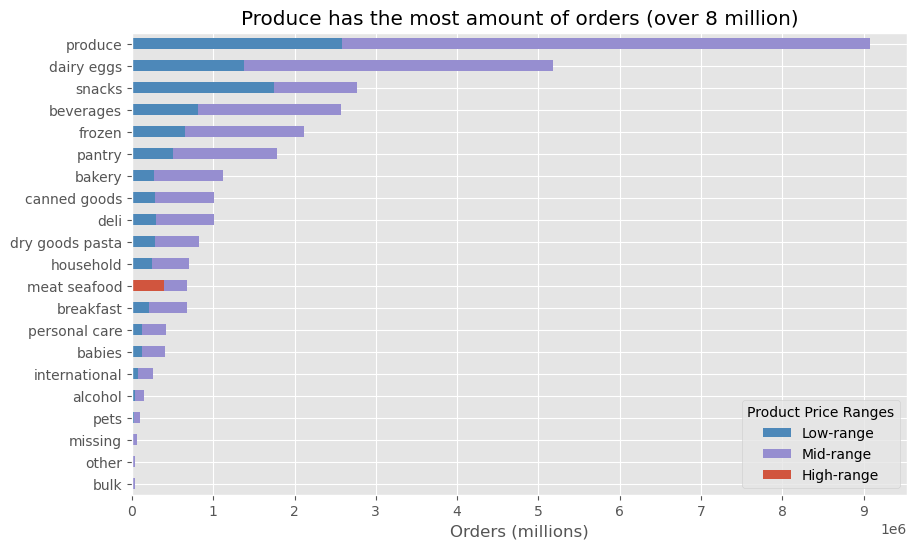

In [124]:
# Visualize count of High-range, Low-range and Mid-range products ordered from each department:

# Define custom colors and labels
colors = ['#D1553E', '#4D88B9', '#968ED0']  # Example colors, replace with your own
labels = ['High-range', 'Low-range', 'Mid-range']
new_labels = ['Low-range', 'Mid-range', 'High-range']  # Desired order of labels

# Add a new column to the dataframe containing the sum of 'High-range product', 'Medium-range product', and 'Low-range product'
crosstab_Price_Range_Dept['total'] = crosstab_Price_Range_Dept.sum(axis=1)

# Sort the dataframe by the values in the 'total' column in descending order
crosstab_Price_Range_Dept = crosstab_Price_Range_Dept.sort_values(by='total', ascending=True)

# Remove the 'total' column to avoid it being included in the plot
crosstab_Price_Range_Dept = crosstab_Price_Range_Dept.drop(columns=['total'])

# Create stacked bar chart
Price_Range_Dept_bar = crosstab_Price_Range_Dept.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0, color=colors)

# Add title and labels
plt.title('Produce has the most amount of orders (over 8 million)')
plt.ylabel('', fontsize = 12)
plt.xlabel('Orders (millions)',  fontsize = 12)

# Add legend with reordered labels
handles, _ = Price_Range_Dept_bar.get_legend_handles_labels()
new_handles = [handles[labels.index(l)] for l in new_labels]
Price_Range_Dept_bar.legend(handles=new_handles, labels=new_labels, title='Product Price Ranges')

# Set the number of ticks on the x-axis
Price_Range_Dept_bar.set_xticks(range(0, 10000000, 1000000)) # Example: set ticks at 0, 20, 40, 60, 80, 100


In [125]:
#Export chart
Price_Range_Dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_Range_Dept_bar.png'),bbox_inches='tight')

In [126]:
# Get the value counts of of High-range, Low-range and Mid-range products
df['Price_Range_Loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: Price_Range_Loc, dtype: int64

In [127]:
# Get the count of distinct values in the 'Product_Name' column
prod_name_dist = df['Product_Name'].nunique()

# Display the result
print("Distinct count of Product_Name: ", prod_name_dist)

Distinct count of Product_Name:  49630


In [128]:
# Get the count of distinct values in the 'Prices' column
prices_dist = df['Prices'].nunique()

# Display the result
print("Distinct count of Prices: ", prices_dist)

Distinct count of Prices:  240


In [129]:
# Use crosstab() to group by 'Product_Name' and display columns 'Prices', 'Department', and 'Price_Range_Loc'
result = pd.crosstab(index=df['Product_Name'], columns=[df['Prices'], df['Department'], df['Price_Range_Loc']])

# Display the result
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Observations
High-range products are sold in three departments: meat & seafood, dairy & eggs, pantry


In [130]:
# Create dataframe of small sample to include 'Order_hour_of_day', 'Prices', 'Price_Range_Loc'

df_price_range = df[['Order_hour_of_day','Price_Range_Loc']]

In [131]:
# Simpler Price-Range Groupings organized as follows:

# <= 5 = 'Low-range product'
# <= 15 = 'Mid-range product'
# > 15 = 'High-range product'

# View counts of each price-range product ordered
df_price_range['Price_Range_Loc'].value_counts()

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: Price_Range_Loc, dtype: int64

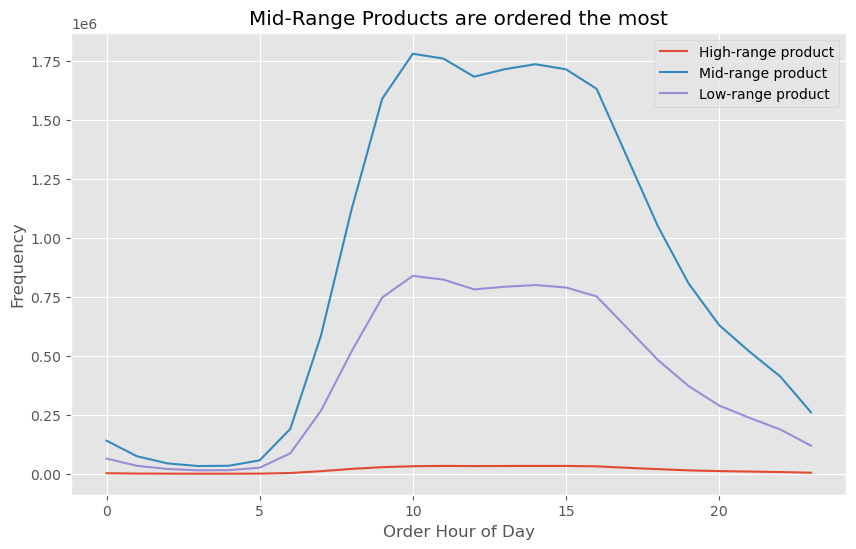

In [132]:
# Then I want three lines on a chart, one for the frequency of each 'Price_Range_Loc'

# Group by 'Order_hour_of_day' and 'Price_Range_Loc' and get the counts
grouped_df = df.groupby(['Order_hour_of_day', 'Price_Range_Loc']).size().unstack().reset_index()

# Plot the line chart
Price_Ranges_Hours = plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Order_hour_of_day'], grouped_df['High-range product'], label='High-range product')
plt.plot(grouped_df['Order_hour_of_day'], grouped_df['Mid-range product'], label='Mid-range product')
plt.plot(grouped_df['Order_hour_of_day'], grouped_df['Low-range product'], label='Low-range product')
plt.xlabel('Order Hour of Day')
plt.ylabel('Frequency')
plt.title('Mid-Range Products are ordered the most')
plt.legend()
plt.show()

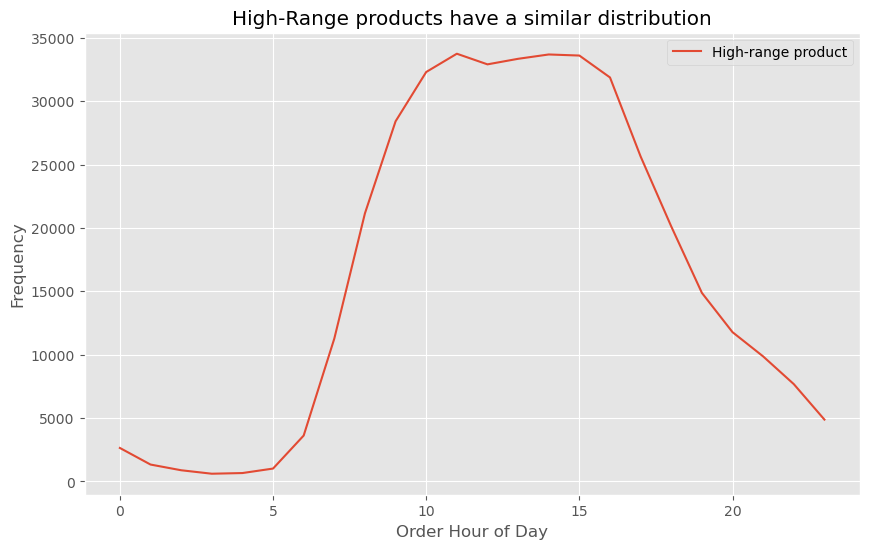

In [133]:
# Plot a line chart just showing High-range product frequency during the day
High_range_Hours = plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Order_hour_of_day'], grouped_df['High-range product'], label='High-range product')
# plt.plot(grouped_df['Order_hour_of_day'], grouped_df['Mid-range product'], label='Mid-range product')
# plt.plot(grouped_df['Order_hour_of_day'], grouped_df['Low-range product'], label='Low-range product')
plt.xlabel('Order Hour of Day')
plt.ylabel('Frequency')
plt.title('High-Range products have a similar distribution')
plt.legend()
plt.show()

In [134]:
# Export Price_Ranges_Hours

Price_Ranges_Hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_Ranges_Hours.png'))

In [135]:
# Export High_range_Hours

High_range_Hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'High_range_Hours.png'))

# Business Question 5
What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?

In [136]:
df['Loyalty_Flag']

0               New customer
1               New customer
2               New customer
3               New customer
4               New customer
                  ...       
30964559    Regular customer
30964560    Regular customer
30964561    Regular customer
30964562    Regular customer
30964563    Regular customer
Name: Loyalty_Flag, Length: 30964564, dtype: object

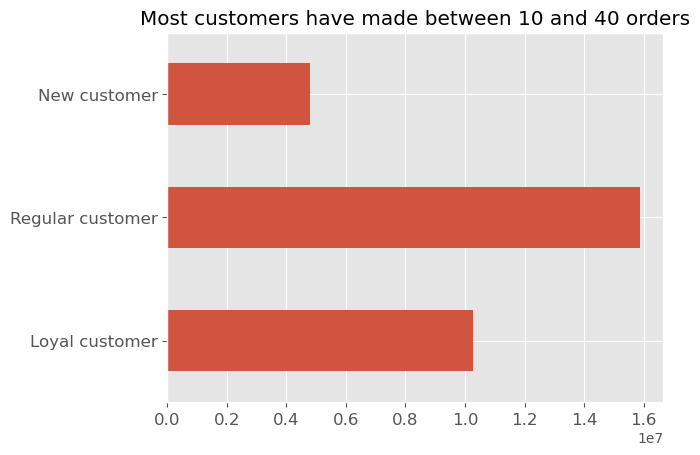

In [137]:
# Define custom colors and the order of categories
colors = ['#D1553E', '#D1553E', '#D1553E'] # Loyal customer is red, new customer is blue, regular customer is purple
categories_order = ['Loyal customer', 'Regular customer','New customer']

# Create bar plot
loyalty_bar = df['Loyalty_Flag'].value_counts()[categories_order].plot(kind='barh', fontsize=12, color=colors)

# Set the title of the plot
loyalty_bar.set_title('Most customers have made between 10 and 40 orders')

# Show the plot
plt.show()


In [138]:
# Export loyalty bar
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'),bbox_inches='tight')

# Business Question 6
Are there differences in ordering habits based on a customer’s loyalty status?

In [139]:
# Create a crosstab to compare Products purchased with Loyalty Flag

crosstab_prods_loyalty = pd.crosstab(df['Department'], df['Loyalty_Flag'], dropna = False)
crosstab_prods_loyalty

Loyalty_Flag,Loyal customer,New customer,Regular customer
Department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


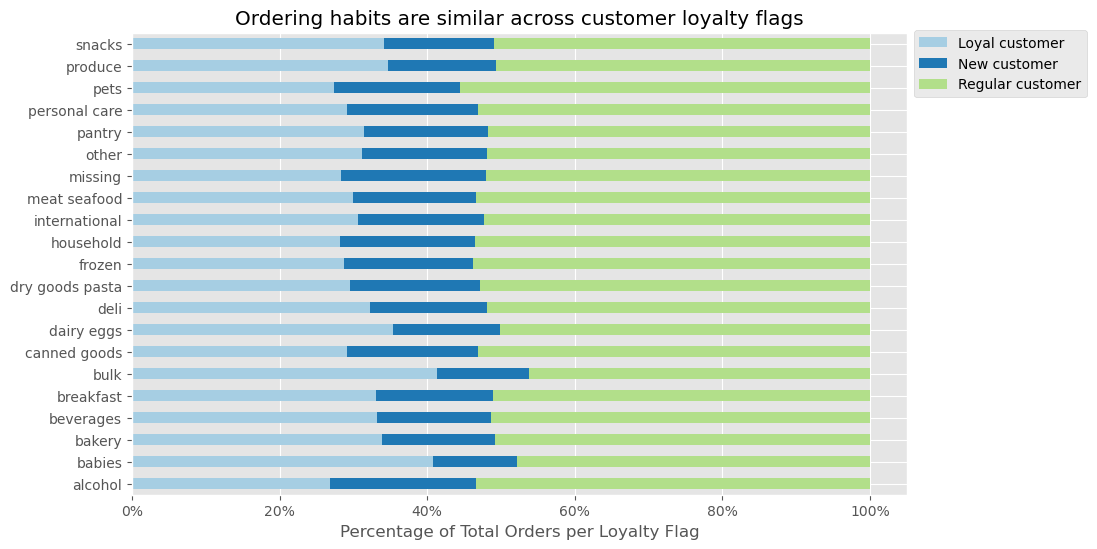

In [140]:
# Visualize count of products ordered from each department by Loyalty Flag:

import matplotlib.ticker as ticker

# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
prods_loyalty_pct = crosstab_prods_loyalty.div(crosstab_prods_loyalty.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_loyalty_bar = prods_loyalty_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
prods_loyalty_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('Ordering habits are similar across customer loyalty flags')
plt.ylabel('', fontsize=12)
plt.xlabel('Percentage of Total Orders per Loyalty Flag', fontsize=12)

# Create custom FuncFormatter to show percentage values with "%" sign
percent_formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
prods_loyalty_bar.xaxis.set_major_formatter(percent_formatter)

# Display the chart
plt.show()

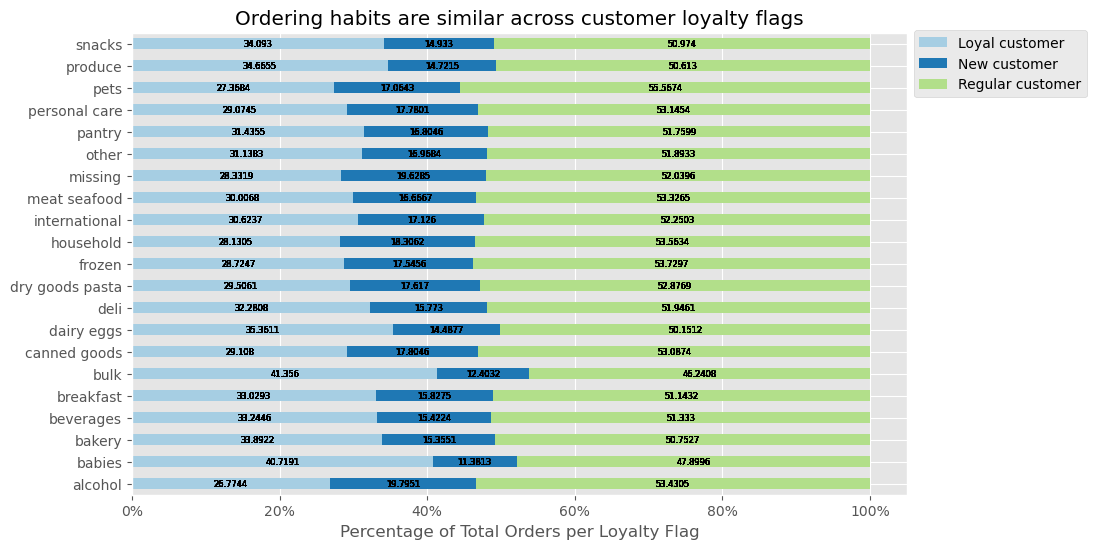

In [141]:
# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
prods_loyalty_pct = crosstab_prods_loyalty.div(crosstab_prods_loyalty.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_loyalty_bar = prods_loyalty_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
prods_loyalty_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('Ordering habits are similar across customer loyalty flags')
plt.ylabel('', fontsize=12)
plt.xlabel('Percentage of Total Orders per Loyalty Flag', fontsize=12)

# Create custom formatter to show percentage values with "%" sign
percent_formatter = ticker.StrMethodFormatter("{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
prods_loyalty_bar.xaxis.set_major_formatter(percent_formatter)

# Add data labels to each bar
# Loop over each row in the DataFrame
for i, row in prods_loyalty_pct.iterrows():
    # Loop over each bar in the row
    for j, value in enumerate(row):
        # Add the data label to the bar
        prods_loyalty_bar.bar_label(prods_loyalty_bar.containers[j], label=f"{value:.0f}%", 
                                    label_type='center', fontsize=6)


# Display the chart
plt.show()

In [142]:
# Export customer ordering habits loyalty bar chart
prods_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prods_loyalty_bar.png'),bbox_inches='tight')

In [143]:
# Create a crosstab to compare Products purchased with Loyalty Flag

crosstab_prods_region = pd.crosstab(df['Department'], df['Region'], dropna = False)
crosstab_prods_region

Region,Midwest,Northeast,South,West
Department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


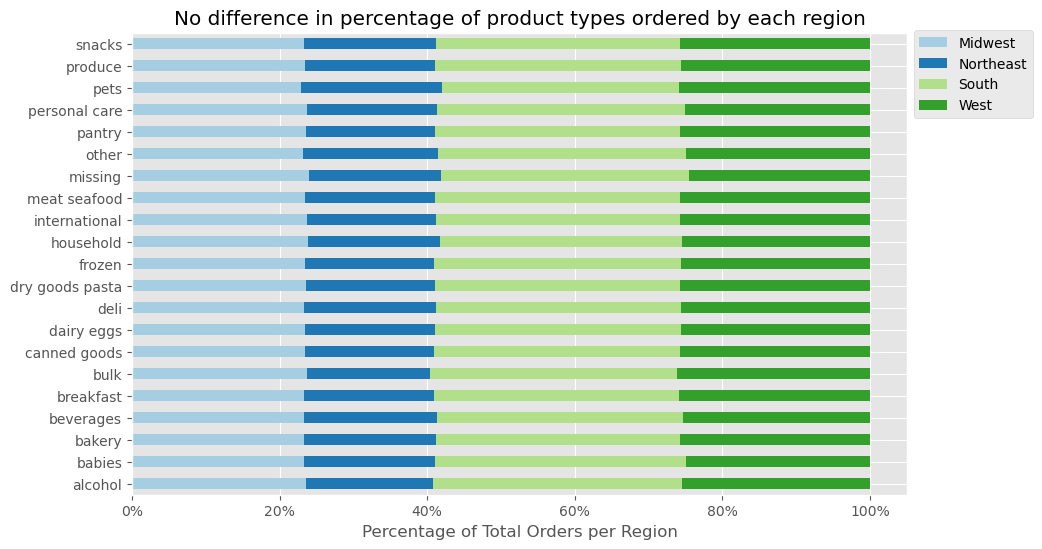

In [144]:
# Visualize count of products ordered from each department per Region:

import matplotlib.ticker as ticker

# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
prods_region_pct = crosstab_prods_region.div(crosstab_prods_region.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_region_pct_bar = prods_region_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
prods_region_pct_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('No difference in percentage of product types ordered by each region')
plt.ylabel('', fontsize=12)
plt.xlabel('Percentage of Total Orders per Region', fontsize=12)

# Create custom FuncFormatter to show percentage values with "%" sign
percent_formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
prods_region_pct_bar.xaxis.set_major_formatter(percent_formatter)

# Display the chart
plt.show()

In [145]:
# Export prods_region_pct_bar
prods_region_pct_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prods_region_pct_bar.png'),bbox_inches='tight')

Text(0.5, 1.0, 'The South has the highest frequency of orders')

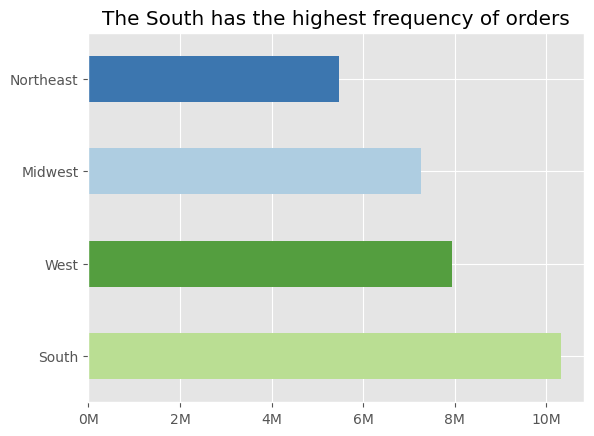

In [146]:
# Bar chart for total orders per region

sns.set_palette("Paired")

# Create the bar chart with custom colors
colors = ['#BADE93', '#549E3F', '#AECDE1', '#3C76AF']
prods_region_bar = df['Region'].value_counts().plot(kind='barh', color=colors)

# Define a custom function to format y-axis labels in millions
def millions_formatter(y, pos):
    return '{:.0f}M'.format(y / 1000000)

# Create a FuncFormatter object for the custom function
formatter = FuncFormatter(millions_formatter)

# Apply the custom formatter to the x-axis
prods_region_bar.xaxis.set_major_formatter(formatter)

prods_region_bar.set_title('The South has the highest frequency of orders')




In [147]:
# Export prods_region_bar
prods_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prods_region_bar.png'),bbox_inches='tight')

In [148]:
# Create a crosstab to compare orders per Regio by Spending Flag

crosstab_ords_region = pd.crosstab(df['Region'], df['Spending_Flag'], dropna = False)
crosstab_ords_region

Spending_Flag,High spender,Low spender
Region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


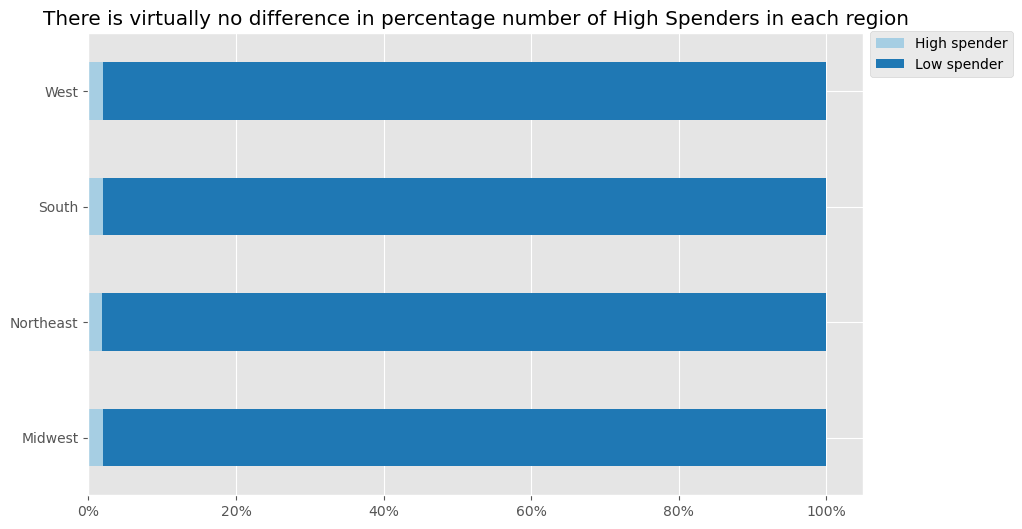

In [149]:
# Visualize count of products ordered from each department per Region:

import matplotlib.ticker as ticker

# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
region_spender_pct = crosstab_ords_region.div(crosstab_ords_region.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
region_spender_pct_bar = region_spender_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
region_spender_pct_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('There is virtually no difference in percentage number of High Spenders in each region')
plt.ylabel('', fontsize=12)
plt.xlabel('', fontsize=12)

# Create custom FuncFormatter to show percentage values with "%" sign
percent_formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
region_spender_pct_bar.xaxis.set_major_formatter(percent_formatter)

# Display the chart
plt.show()

In [150]:
# Export region_spender_pct_bar
region_spender_pct_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spender_pct_bar.png'),bbox_inches='tight')

# Business Question 8
Is there a connection between age and family status in terms of ordering habits?

In [151]:
# Create a crosstab to compare Family Status with No. Dependents

crosstab_fam_dep = pd.crosstab(df['Family_Status'], df['Age_Group'], dropna = False)
crosstab_fam_dep

Age_Group,Middle-Aged,Senior,Young Adult
Family_Status,,,
divorced/widowed,623313,2021958,0
living with parents and siblings,0,0,1481172
married,9046762,6173586,6523363
single,2433835,0,2660575


# Business Question 10 - Customer Profiles


## Household Size

In [152]:
df.shape

(30964564, 42)

In [153]:
print(df['Order_ID'].nunique())

3064375


In [154]:
df_sort_Order_ID = df.sort_values(by=['Order_ID'])

In [155]:
df.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Orders_day_of_the_week',
       'Order_hour_of_day', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Department', 'Prices', 'Price_Range_Loc',
       'Busiest_Day', 'Busiest_Days', 'Busiest_Period_of_Day', 'Max_Order',
       'Loyalty_Flag', 'Mean_Prices', 'Spending_Flag', 'Median_Days',
       'Frequency_Flag', 'Gender', 'State', 'Age', 'Date_Joined', 'Dependents',
       'Family_Status', 'Income', 'Region', 'Low_Activity', 'Age_Group',
       'Income_Bracket', 'Household_Size', 'Baby', 'Pet', 'Day_Shopper',
       'Parent_Profile', 'Prof_Profile', 'Profiles'],
      dtype='object')

In [156]:
# Create new dataframe grouped on 'Order_ID' to explore aggregations of each order

# Order_ID, User_ID, Total of order (Prices), Order_Number, Loyalty, Houseshold_size, Region

df_grouped = df.groupby('Order_ID').agg({'User_ID': 'first', 'Prices':'sum','Order_Number': 'first', 'Loyalty_Flag': 'first', 'Household_Size': 'first', 'Region': 'first'}).sort_values(by=['Order_Number'], ascending=False)

df_grouped.head(100)

,User_ID,Prices,Order_Number,Loyalty_Flag,Household_Size,Region
Order_ID,,,,,,
17757,79520,46.1,99,Loyal customer,Small,South
2496513,136066,29.2,99,Loyal customer,Medium,South
2650869,147158,105.6,99,Loyal customer,Medium,West
3161478,31186,117.4,99,Loyal customer,Medium,Northeast
1155332,205405,199.3,99,Loyal customer,Small,South
...,...,...,...,...,...,...
554455,18620,23.9,99,Loyal customer,Medium,West
1336450,122550,29.9,99,Loyal customer,Medium,West
774093,172294,75.7,99,Loyal customer,Medium,Midwest


In [157]:
df_grouped.groupby('Region')['Prices'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Region,,,,
Midwest,0.0,751.1,78.653195,64.4
Northeast,0.0,1092.2,78.705949,64.5
South,0.0,875.0,78.674342,64.3
West,0.0,852.5,78.807954,64.6


## Depencies Profiles
#### Young Parent
#### Single Parent
#### Single, no children
#### Married with Children
#### Living with family and siblings and with dependents

In [158]:
# Young Parent profile condition - at least one dependent and in the 'Young Adult' age group

df.loc[(df['Dependents'] >= 1) &  (df['Age_Group'] == 'Young Adult'), 'Parent_Profile'] = 'Young Parent'

In [159]:
# Single Parent profile condition - at least one dependent and not 'Married'

df.loc[(df['Dependents'] >= 1) &  (df['Family_Status'] != 'married'), 'Parent_Profile'] = 'Single Parent'

In [160]:
# Single Adult, no children profile condition - less then 1 dependent and 'Single' 

df.loc[(df['Dependents'] < 1) &  (df['Family_Status'] == 'single'), 'Parent_Profile'] = 'Single, No Children'

In [161]:
# Married with children profile condition - 1 dependent or more and 'Married'

df.loc[(df['Dependents'] >= 1) &  (df['Family_Status'] == 'married'), 'Parent_Profile'] = 'Married with Children'

In [162]:
# Living with parents and siblings and with children profile condition - 1 dependent or more and 'Living with family and children'

df.loc[(df['Dependents'] >= 1) &  (df['Family_Status'] == 'living with parents and siblings'), 'Parent_Profile'] = 'Living with family and dependents'

In [163]:
# Divorced/Widowed with children profile condition - 1 dependent or more and 'Married'
df.loc[(df['Dependents'] >= 1) &  (df['Family_Status'] == 'divorced/widowed'), 'Parent_Profile'] = 'Divorced/Widowed with Children'

In [164]:
# Check counts

df['Parent_Profile'].value_counts(dropna=True)

Married with Children                21743711
Single, No Children                   5094410
Living with family and dependents     1481172
Name: Parent_Profile, dtype: int64

<AxesSubplot:>

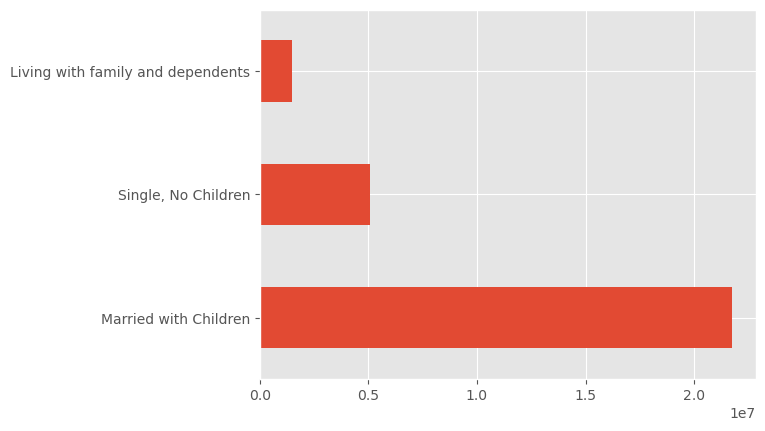

In [165]:
# Question 6 from task: Create an appropriate visualization to show the distribution of profiles.

# Import style 'ggplot'
plt.style.use('ggplot')

# Plot Bar chart of 'Parent Profiles'
df['Parent_Profile'].value_counts(dropna=True).plot.barh()

In [166]:
# min, max, mean, median usage frequency (Add_To_Cart_Order) by Parental Status

df.groupby('Parent_Profile')['Add_To_Cart_Order'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Parent_Profile,,,,
Living with family and dependents,1,102,8.373383,6.0
Married with Children,1,145,8.371756,6.0
"Single, No Children",1,109,8.320522,6.0


In [167]:
# min, max, mean, median cost of products (Prices) by Parental Status

df.groupby('Parent_Profile')['Prices'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Parent_Profile,,,,
Living with family and dependents,1.0,25.0,7.800604,7.4
Married with Children,1.0,25.0,7.790278,7.4
"Single, No Children",1.0,25.0,7.783597,7.4


In [168]:
# Create a crosstab to compare Products purchased by different Parent Profiles

crosstab_prods_parent = pd.crosstab(df['Department'], df['Parent_Profile'], dropna = False)
crosstab_prods_parent

Parent_Profile,Living with family and dependents,Married with Children,"Single, No Children"
Department,,,
alcohol,8379,99421,24968
babies,19381,287683,68977
bakery,53684,785749,185660
beverages,119107,1807453,424462
breakfast,33198,471220,109842
bulk,1633,23818,5324
canned goods,48477,712577,166752
dairy eggs,250207,3632599,851774
deli,48119,702333,166633


<AxesSubplot:ylabel='Department'>

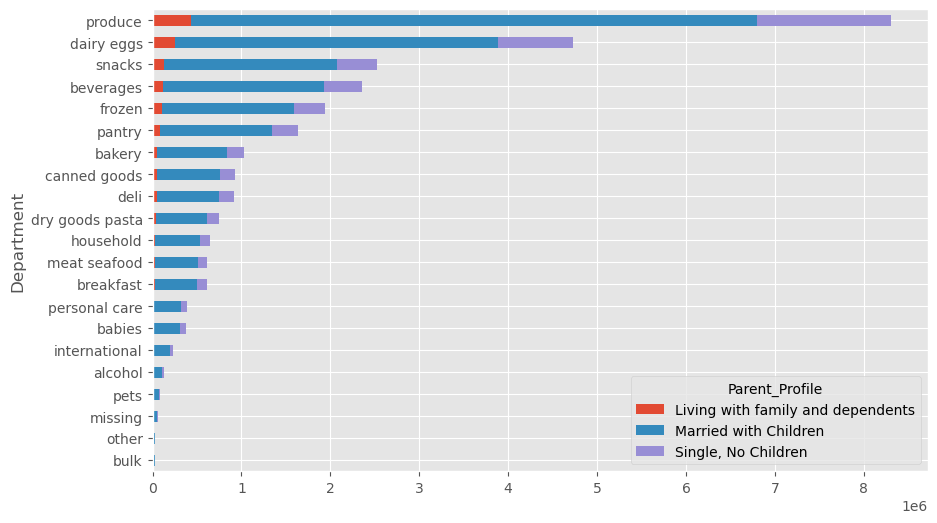

In [169]:
# Sort the bars by number of orders at the top, descending
# Add a new column to the dataframe containing the sum of Profile orders
crosstab_prods_parent['total'] = crosstab_prods_parent.sum(axis=1)

# Sort the dataframe by the values in the 'total' column in descending order
crosstab_prods_parent = crosstab_prods_parent.sort_values(by='total', ascending=True)

# Remove the 'total' column to avoid it being included in the plot
crosstab_prods_parent = crosstab_prods_parent.drop(columns=['total'])


# Create Stacked Bar chart
crosstab_prods_parent.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

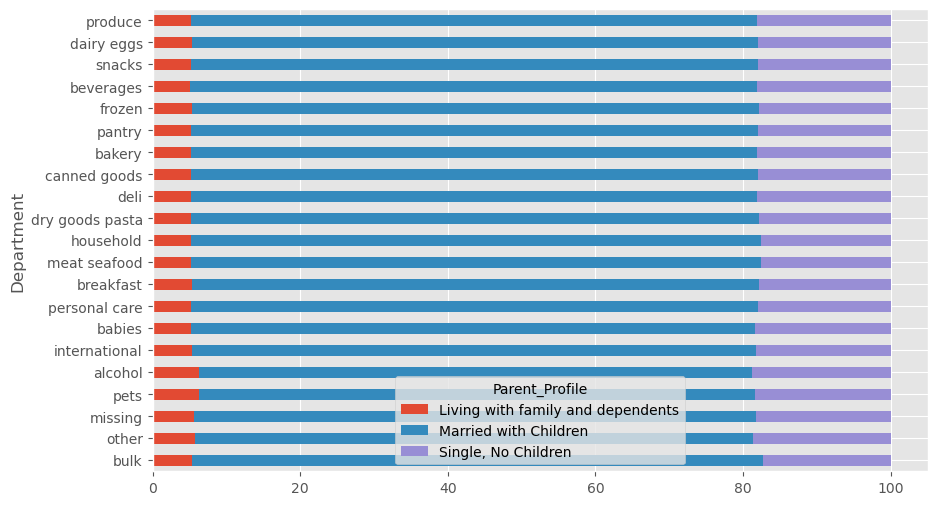

In [170]:
# Visualize count of products ordered from each department per Region:

import matplotlib.ticker as ticker

# Compute row-wise percentages
prods_parent_pct = crosstab_prods_parent.div(crosstab_prods_parent.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_parent_pct_bar = prods_parent_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

In [171]:
# Explore who is buying babies products

df['Department']

0           beverages
1           beverages
2           beverages
3           beverages
4           beverages
              ...    
30964559    beverages
30964560    beverages
30964561    beverages
30964562    beverages
30964563    beverages
Name: Department, Length: 30964564, dtype: object

## Professional Profile groups
- Young Professional
- Mature Professional
- Senior/Retired Professional

In [172]:
# Young Professional profile

df.loc[(df['Age_Group'] == 'Young Adult') & (df['Income_Bracket'] != 'Low Income'), 'Prof_Profile'] = 'Young Professional'

In [173]:
# Mature Professional profile

df.loc[(df['Age_Group'] == 'Middle-Aged') & (df['Income_Bracket'] != 'Low Income'), 'Prof_Profile'] = 'Mature Professional'

In [174]:
# Retirement Age

df.loc[(df['Age_Group'] == 'Senior') & (df['Income_Bracket'] != 'Low Income'), 'Prof_Profile'] = 'Senior/Retired Professional'

<AxesSubplot:>

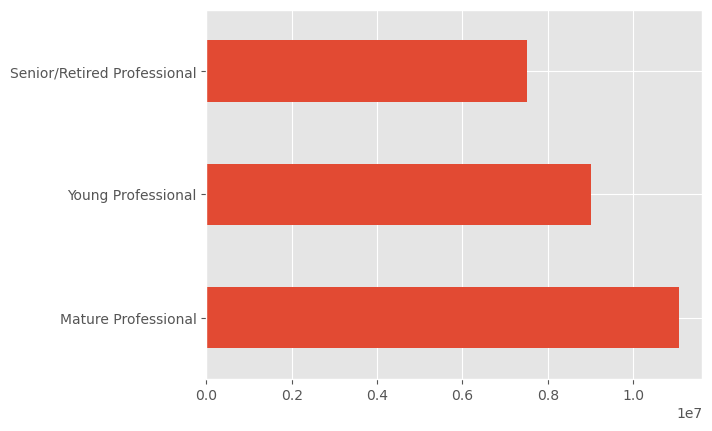

In [175]:
df['Prof_Profile'].value_counts(dropna=True).plot.barh()

In [176]:
# New Parent - Dependent of 1 or more and purchases 'babies' products

df.loc[(df['Dependents'] >= 1) &  (df['Baby'] == 'Yes'), 'Profiles'] = 'New Parent'


In [177]:
df['Profiles'].value_counts(dropna=False)

NaN           30657500
New Parent      307064
Name: Profiles, dtype: int64

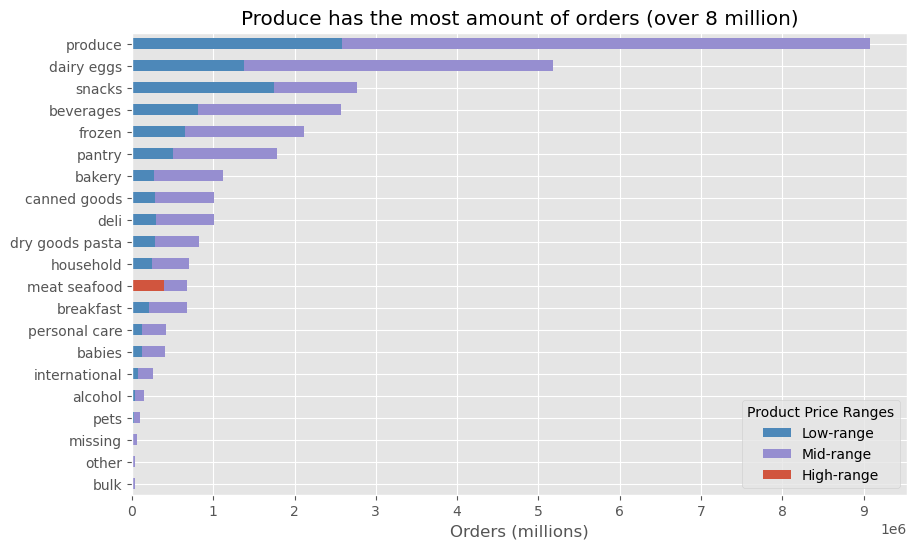

In [178]:
# Visualize count of High-range, Low-range and Mid-range products ordered from each department:

# Define custom colors and labels
colors = ['#D1553E', '#4D88B9', '#968ED0']  # Example colors, replace with your own
labels = ['High-range', 'Low-range', 'Mid-range']
new_labels = ['Low-range', 'Mid-range', 'High-range']  # Desired order of labels

# Add a new column to the dataframe containing the sum of 'High-range product', 'Medium-range product', and 'Low-range product'
crosstab_Price_Range_Dept['total'] = crosstab_Price_Range_Dept.sum(axis=1)

# Sort the dataframe by the values in the 'total' column in descending order
crosstab_Price_Range_Dept = crosstab_Price_Range_Dept.sort_values(by='total', ascending=True)

# Remove the 'total' column to avoid it being included in the plot
crosstab_Price_Range_Dept = crosstab_Price_Range_Dept.drop(columns=['total'])

# Create stacked bar chart
Price_Range_Dept_bar = crosstab_Price_Range_Dept.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0, color=colors)

# Add title and labels
plt.title('Produce has the most amount of orders (over 8 million)')
plt.ylabel('', fontsize = 12)
plt.xlabel('Orders (millions)',  fontsize = 12)

# Add legend with reordered labels
handles, _ = Price_Range_Dept_bar.get_legend_handles_labels()
new_handles = [handles[labels.index(l)] for l in new_labels]
Price_Range_Dept_bar.legend(handles=new_handles, labels=new_labels, title='Product Price Ranges')

# Set the number of ticks on the x-axis
Price_Range_Dept_bar.set_xticks(range(0, 10000000, 1000000)) # Example: set ticks at 0, 20, 40, 60, 80, 100


# PROFILES

In [179]:
df.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Orders_day_of_the_week',
       'Order_hour_of_day', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Product_Name', 'Aisle_ID',
       'Department_ID', 'Department', 'Prices', 'Price_Range_Loc',
       'Busiest_Day', 'Busiest_Days', 'Busiest_Period_of_Day', 'Max_Order',
       'Loyalty_Flag', 'Mean_Prices', 'Spending_Flag', 'Median_Days',
       'Frequency_Flag', 'Gender', 'State', 'Age', 'Date_Joined', 'Dependents',
       'Family_Status', 'Income', 'Region', 'Low_Activity', 'Age_Group',
       'Income_Bracket', 'Household_Size', 'Baby', 'Pet', 'Day_Shopper',
       'Parent_Profile', 'Prof_Profile', 'Profiles'],
      dtype='object')

### 10a Age Group and Hour of the Day

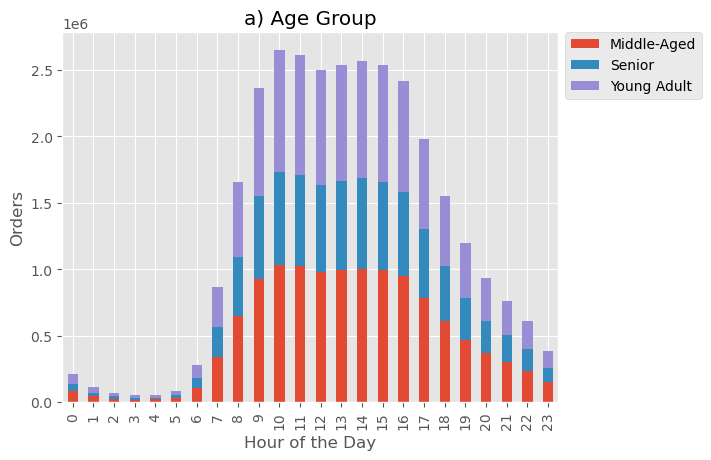

In [180]:
# Create a crosstab to Hour of the Day by Age Group

crosstab_hour_age = pd.crosstab(df['Order_hour_of_day'], df['Age_Group'], dropna = False)

# Plot

ct_hour_age_bar = crosstab_hour_age.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_age_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('a) Age Group')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_age_bar
ct_hour_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10a_ct_hour_age_bar.png'),bbox_inches='tight')

### 10b Gender and Hour of the Day

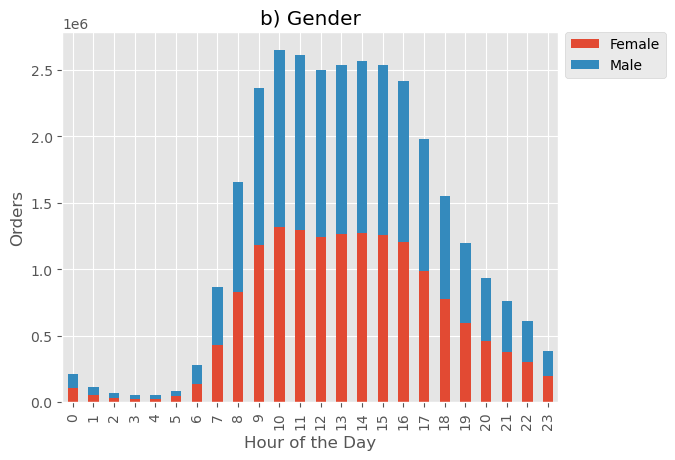

In [181]:
# Create a crosstab to Hour of the Day by Gender

ct_hour_gender = pd.crosstab(df['Order_hour_of_day'], df['Gender'], dropna = False)

# Plot

ct_hour_gender_bar = ct_hour_gender.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_gender_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('b) Gender')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_gender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10b_ct_hour_gender_bar.png'),bbox_inches='tight')

### 10c Income Bracket and Hour of the Day

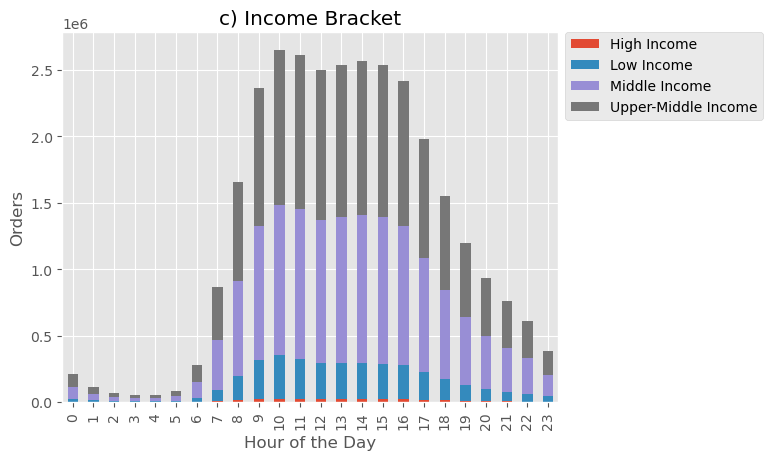

In [182]:
# Create a crosstab to Hour of the Day by Income Bracket

ct_hour_income = pd.crosstab(df['Order_hour_of_day'], df['Income_Bracket'], dropna = False)

# plot 
ct_hour_income_bar = ct_hour_income.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_income_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('c) Income Bracket')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10c_ct_hour_income_bar.png'),bbox_inches='tight')

### 10d Family Status and Hour of the Day

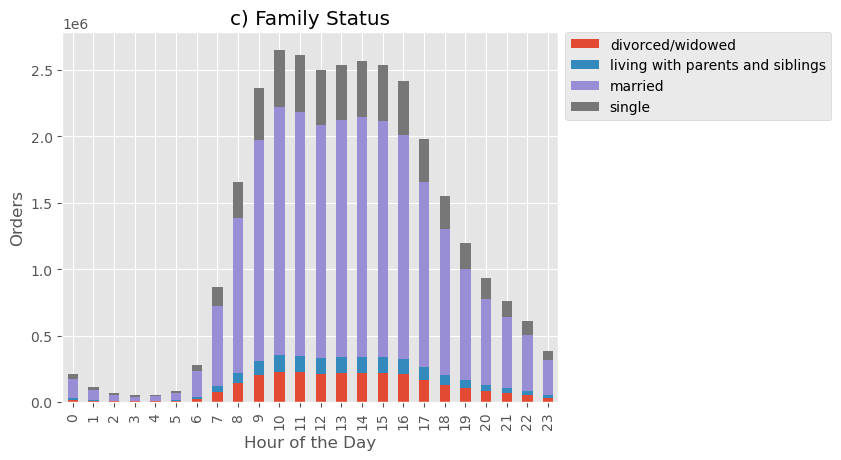

In [183]:
# Create a crosstab to Hour of the Day by Family Status

ct_hour_family = pd.crosstab(df['Order_hour_of_day'], df['Family_Status'], dropna = False)

# plot 
ct_hour_family_bar = ct_hour_family.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_family_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('c) Family Status')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10d_ct_hour_family_bar.png'),bbox_inches='tight')

### 10e Household Size and Hour of the Day

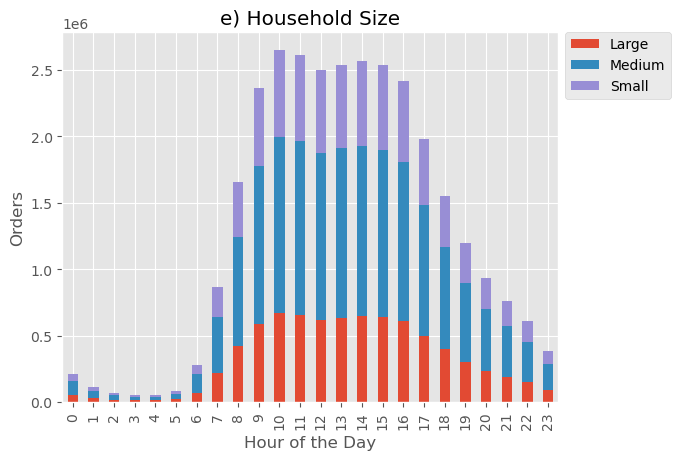

In [184]:
# Create a crosstab to Hour of the Day by Household Size

ct_hour_household = pd.crosstab(df['Order_hour_of_day'], df['Household_Size'], dropna = False)

# plot 
ct_hour_household_bar = ct_hour_household.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_household_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('e) Household Size')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_household_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10e_ct_hour_household_bar.png'),bbox_inches='tight')

### 10f Loyalty and Hour of the Day

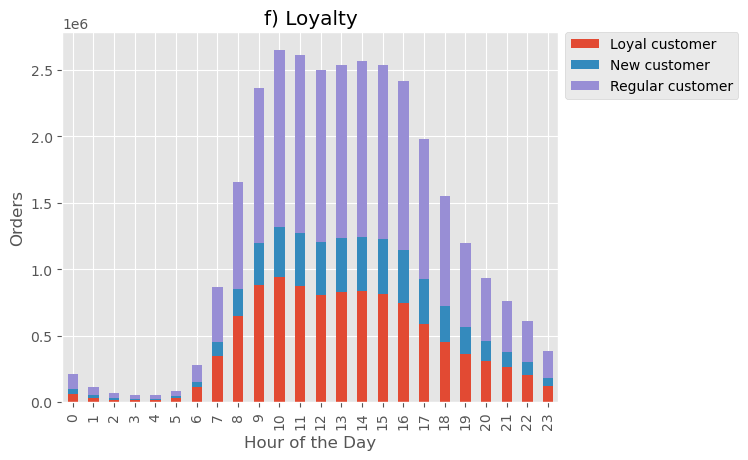

In [185]:
# Create a crosstab to Hour of the Day by Loyalty Flag

ct_hour_loyalty = pd.crosstab(df['Order_hour_of_day'], df['Loyalty_Flag'], dropna = False)

# plot 
ct_hour_loyalty_bar = ct_hour_loyalty.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_loyalty_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('f) Loyalty')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10f_ct_hour_loyalty_bar.png'),bbox_inches='tight')

### 10g Parent Profile and Hour of the Day

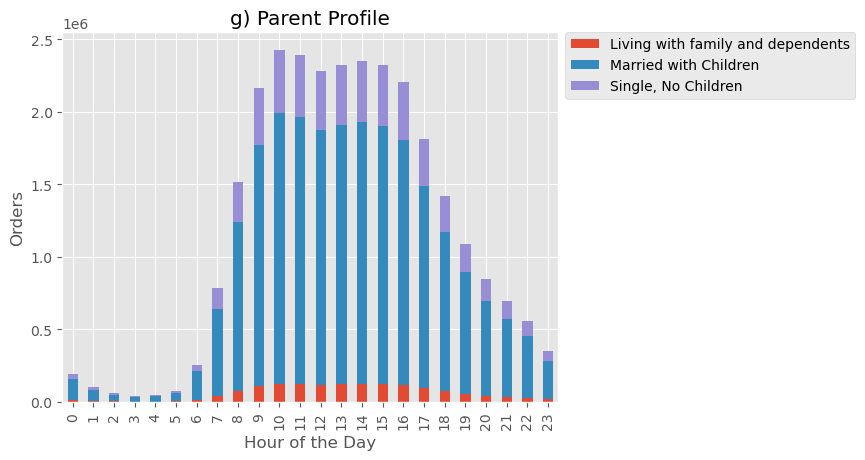

In [186]:
# Create a crosstab to Hour of the Day by Parent_Profile

ct_hour_parent = pd.crosstab(df['Order_hour_of_day'], df['Parent_Profile'], dropna = False)

# plot 
ct_hour_parent_bar = ct_hour_parent.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_parent_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('g) Parent Profile')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10g_ct_hour_parent_bar.png'),bbox_inches='tight')



### 10h Professional Profile and Hour of the Day

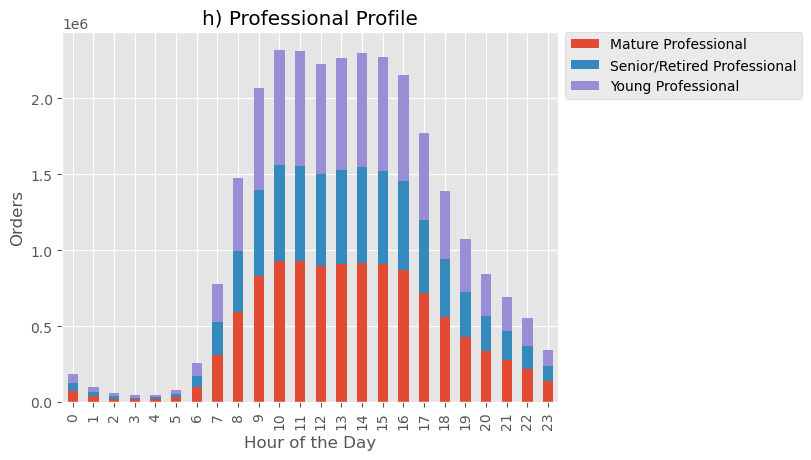

In [187]:
# Create a crosstab to Hour of the Day by Prof_Profile

ct_hour_prof = pd.crosstab(df['Order_hour_of_day'], df['Prof_Profile'], dropna = False)
ct_hour_prof

# plot
ct_hour_prof_bar = ct_hour_prof.plot(kind='bar', stacked=True)

# Add legend with custom title and location
ct_hour_prof_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('h) Professional Profile')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)

# export ct_hour_gender_bar
ct_hour_prof_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10h_ct_hour_prof_bar.png'),bbox_inches='tight')

## Profiles and Day of the Week

### 10a-ii) Age Group and Day of the Week

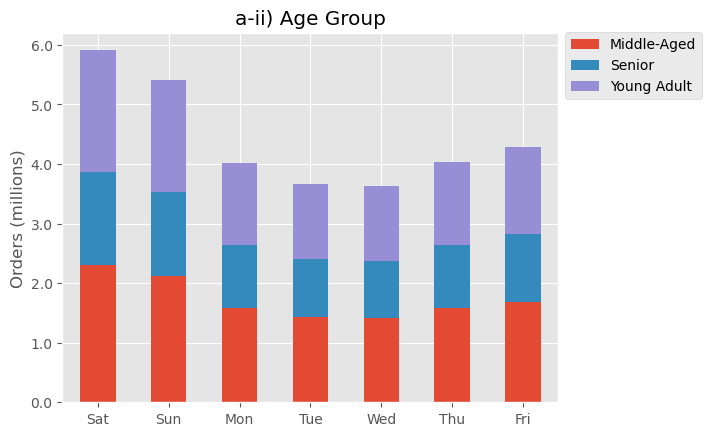

In [188]:
# Create a crosstab to Hour of the Day by Prof_Profile

ct_day_age = pd.crosstab(df['Orders_day_of_the_week'], df['Age_Group'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_age_bar = ct_day_age.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_age_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_age_bar.set_xticks(range(7))  # Set tick locations
ct_day_age_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_age_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_age_bar.xaxis.set_major_locator(loc)
ct_day_age_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_age_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('a-ii) Age Group')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10a-ii_ct_day_age_bar.png'),bbox_inches='tight')

### 10b-ii Gender and Day of the Week 

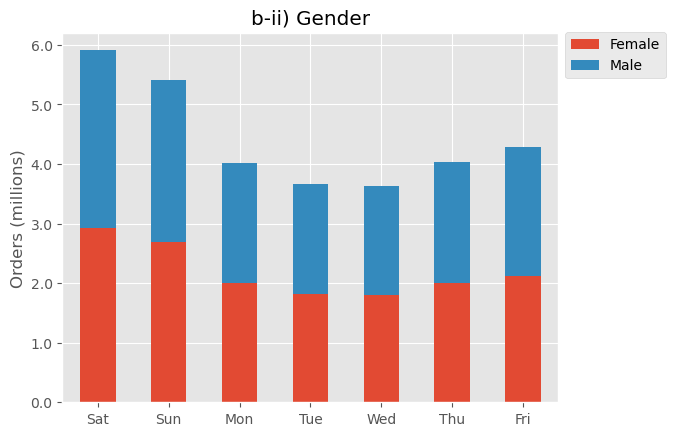

In [189]:
# Create a crosstab to Hour of the Day by Prof_Profile

ct_day_gender = pd.crosstab(df['Orders_day_of_the_week'], df['Gender'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_gender_bar = ct_day_gender.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_gender_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_gender_bar.set_xticks(range(7))  # Set tick locations
ct_day_gender_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_gender_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_gender_bar.xaxis.set_major_locator(loc)
ct_day_gender_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_gender_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('b-ii) Gender')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_gender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10b-ii_ct_day_gender_bar.png'),bbox_inches='tight')

### 10c-ii Income Bracket and Day of the Week

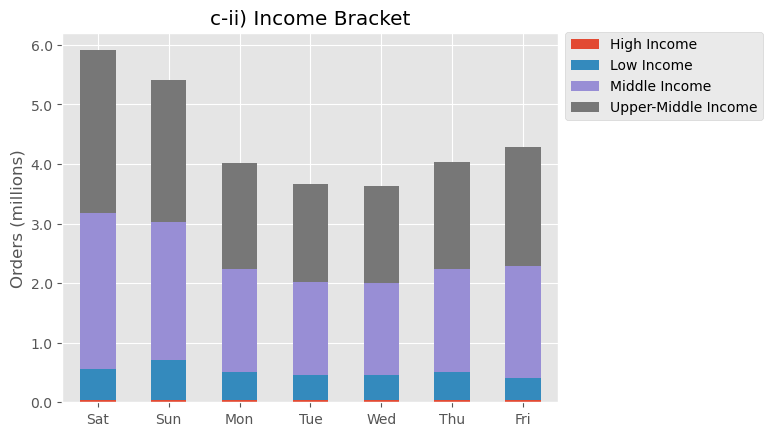

In [190]:
# Create a crosstab to Day of the Week by Income_Bracket

ct_day_income = pd.crosstab(df['Orders_day_of_the_week'], df['Income_Bracket'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_income_bar = ct_day_income.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_income_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_income_bar.set_xticks(range(7))  # Set tick locations
ct_day_income_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_income_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_income_bar.xaxis.set_major_locator(loc)
ct_day_income_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_income_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('c-ii) Income Bracket')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10c-ii_ct_day_income_bar.png'),bbox_inches='tight')

### 10d-ii Family Status

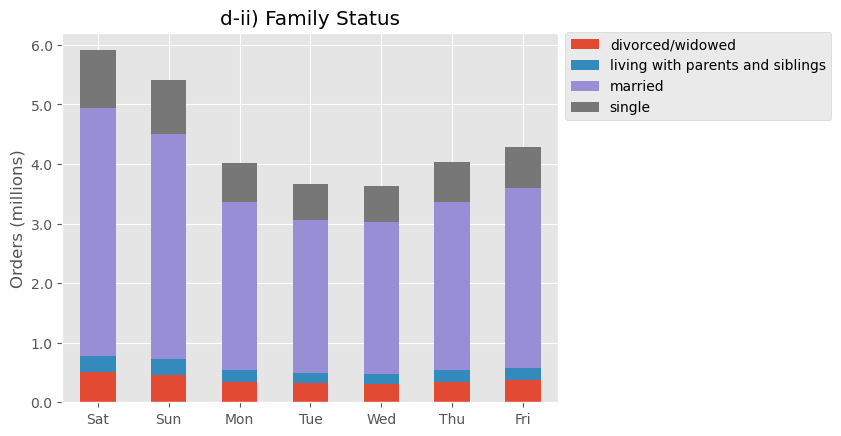

In [191]:
# Create a crosstab to Day of the Week by Family_Status

ct_day_family = pd.crosstab(df['Orders_day_of_the_week'], df['Family_Status'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_family_bar = ct_day_family.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_family_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_family_bar.set_xticks(range(7))  # Set tick locations
ct_day_family_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_family_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_family_bar.xaxis.set_major_locator(loc)
ct_day_family_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_family_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('d-ii) Family Status')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10d-ii_ct_day_family_bar.png'),bbox_inches='tight')

### 10e-iii Household Size

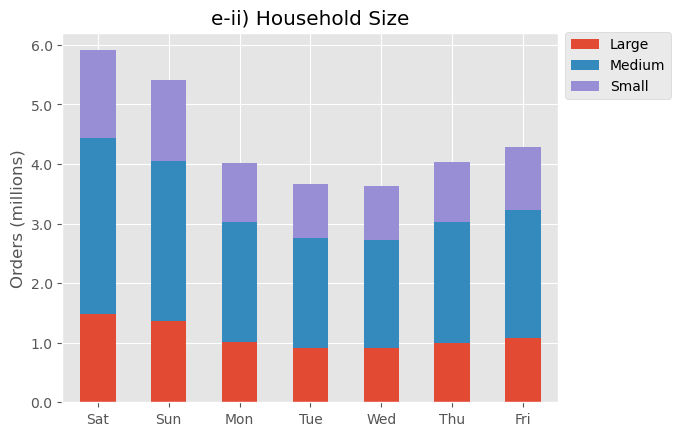

In [192]:
# Create a crosstab to Day of the Week by Household_Size

ct_day_household = pd.crosstab(df['Orders_day_of_the_week'], df['Household_Size'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_household_bar = ct_day_household.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_household_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_household_bar.set_xticks(range(7))  # Set tick locations
ct_day_household_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_household_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_household_bar.xaxis.set_major_locator(loc)
ct_day_household_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_household_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('e-ii) Household Size')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_household_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10e-ii_ct_day_household_bar.png'),bbox_inches='tight')

### 10f-ii Loyalty

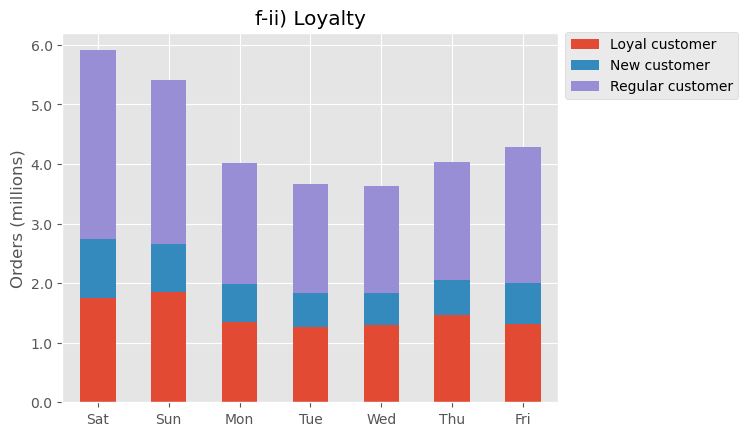

In [193]:
# Create a crosstab to Day of the Week by Loyalty_Flag

ct_day_loyalty = pd.crosstab(df['Orders_day_of_the_week'], df['Loyalty_Flag'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_loyalty_bar = ct_day_loyalty.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_loyalty_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_loyalty_bar.set_xticks(range(7))  # Set tick locations
ct_day_loyalty_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_loyalty_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_loyalty_bar.xaxis.set_major_locator(loc)
ct_day_loyalty_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_loyalty_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('f-ii) Loyalty')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10f-ii_ct_day_loyalty_bar.png'),bbox_inches='tight')

### 10g-iii Parent Profile

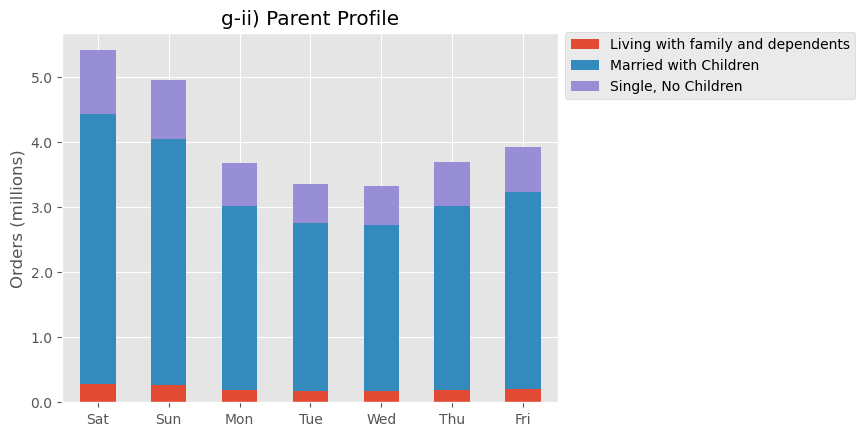

In [194]:
# Create a crosstab to Day of the Week by Parent_Profile

ct_day_parent = pd.crosstab(df['Orders_day_of_the_week'], df['Parent_Profile'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_parent_bar = ct_day_parent.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_parent_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_parent_bar.set_xticks(range(7))  # Set tick locations
ct_day_parent_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_parent_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_parent_bar.xaxis.set_major_locator(loc)
ct_day_parent_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_parent_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('g-ii) Parent Profile')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10f-ii_ct_day_parent_bar.png'),bbox_inches='tight')

### 10h-ii Professional Profile

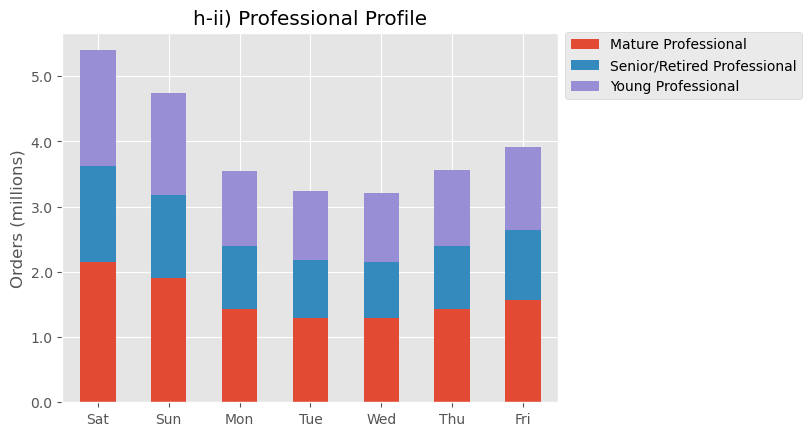

In [195]:
# Create a crosstab to Day of the Week by Prof_Profile

ct_day_prof = pd.crosstab(df['Orders_day_of_the_week'], df['Prof_Profile'], dropna = False)

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# plot
ct_day_prof_bar = ct_day_prof.plot(kind='bar', stacked=True )

# use millions_formatter from FuncFormatter to format Number of Orders as millions
ct_day_prof_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Define custom tick labels
day_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Set custom tick labels on x-axis
ct_day_prof_bar.set_xticks(range(7))  # Set tick locations
ct_day_prof_bar.set_xticklabels(day_labels)  # Set tick labels

# Set rotation angle of x-axis tick labels
ct_day_prof_bar.tick_params(axis='x', rotation=0)

# Create FixedLocator and FixedFormatter for x-axis ticks
loc = FixedLocator(range(7))
fmt = FixedFormatter(day_labels)
ct_day_prof_bar.xaxis.set_major_locator(loc)
ct_day_prof_bar.xaxis.set_major_formatter(fmt)

# Add legend with custom title and location
ct_day_prof_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('h-ii) Professional Profile')
plt.ylabel('Orders (millions)', fontsize=12)
plt.xlabel('', fontsize=12)

# export ct_hour_gender_bar
ct_day_prof_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10h-ii_ct_day_prof_bar.png'),bbox_inches='tight')

## Products
### 10a-iii Age group and Products

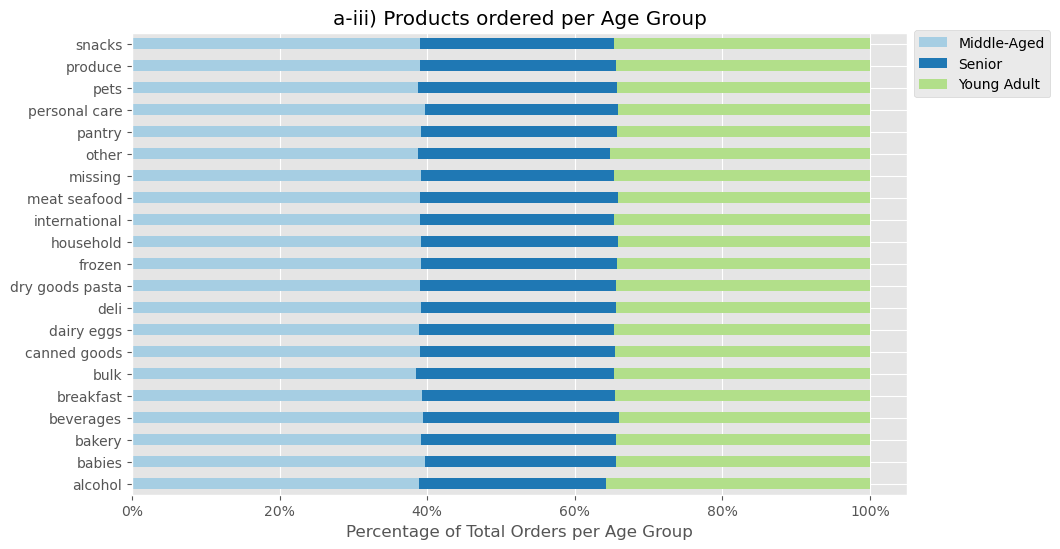

In [196]:
# Create a crosstab to compare Products purchased by Age Group

ct_prods_age = pd.crosstab(df['Department'], df['Age_Group'], dropna = False)

# Visualize count of products ordered from each department per Region:

import matplotlib.ticker as ticker

# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
prods_age_pct = ct_prods_age.div(ct_prods_age.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_age_pct_bar = prods_age_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
prods_age_pct_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('a-iii) Products ordered per Age Group')
plt.ylabel('', fontsize=12)
plt.xlabel('Percentage of Total Orders per Age Group', fontsize=12)

# Create custom FuncFormatter to show percentage values with "%" sign
percent_formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
prods_age_pct_bar.xaxis.set_major_formatter(percent_formatter)

# Display the chart
plt.show()

# export prods_age_pct_bar
prods_age_pct_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10a-iii_prods_age_pct_bar.png'),bbox_inches='tight')

### 10b-iii Gender and Products

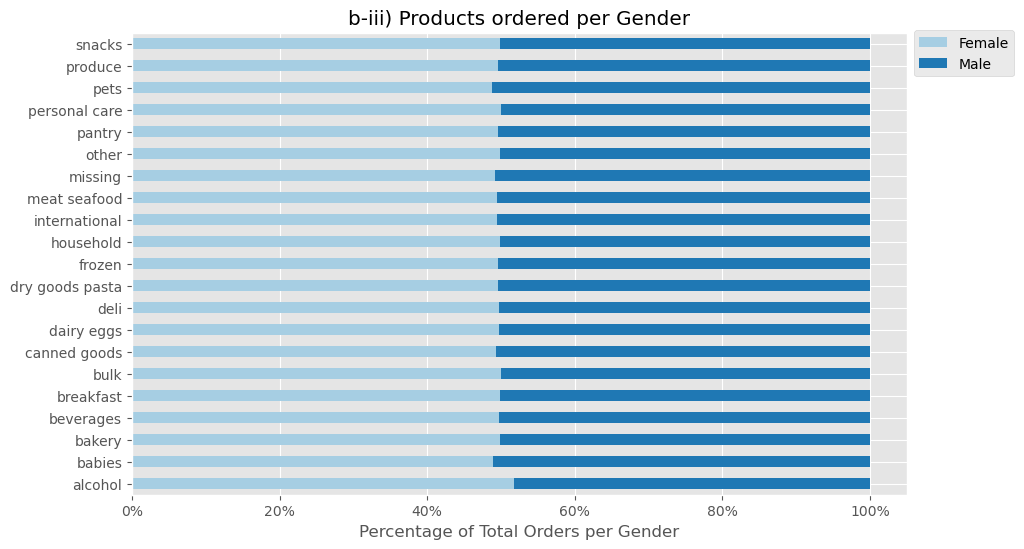

In [197]:
# Create a crosstab to compare Products purchased by Gender

ct_prods_gender = pd.crosstab(df['Department'], df['Gender'], dropna = False)

# Visualize count of products ordered from each department per Region:

import matplotlib.ticker as ticker

# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
prods_gender_pct = ct_prods_gender.div(ct_prods_gender.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_gender_pct_bar = prods_gender_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
prods_gender_pct_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('b-iii) Products ordered per Gender')
plt.ylabel('', fontsize=12)
plt.xlabel('Percentage of Total Orders per Gender', fontsize=12)

# Create custom FuncFormatter to show percentage values with "%" sign
percent_formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
prods_gender_pct_bar.xaxis.set_major_formatter(percent_formatter)

# Display the chart
plt.show()

# export prods_age_pct_bar
prods_gender_pct_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10b-iii_prods_gender_pct_bar.png'),bbox_inches='tight')

### 10c-iii Income Bracket and Products

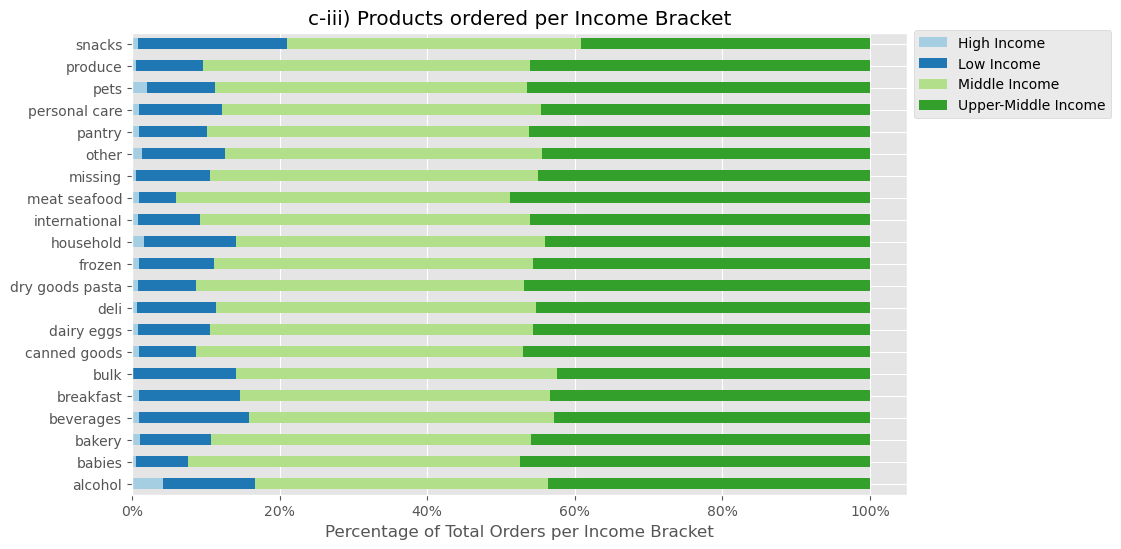

In [198]:
# Create a crosstab to compare Products purchased by Income_Bracket

ct_prods_income = pd.crosstab(df['Department'], df['Income_Bracket'], dropna = False)

# Visualize count of products ordered from each department per Income_Bracket:

import matplotlib.ticker as ticker

# Set Seaborn color palette to "Paired"
sns.set_palette("Paired")

# Compute row-wise percentages
prods_income_pct = ct_prods_income.div(ct_prods_income.sum(axis=1), axis=0) * 100

# Create horizontal percentage stacked bar chart
prods_income_pct_bar = prods_income_pct.plot(kind='barh', stacked=True, figsize=(10, 6), rot=0)

# Add legend with custom title and location
prods_income_pct_bar.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left')

# Add title and axis labels
plt.title('c-iii) Products ordered per Income Bracket')
plt.ylabel('', fontsize=12)
plt.xlabel('Percentage of Total Orders per Income Bracket', fontsize=12)

# Create custom FuncFormatter to show percentage values with "%" sign
percent_formatter = ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%")

# Set the y-axis tick labels to use the custom formatter
prods_income_pct_bar.xaxis.set_major_formatter(percent_formatter)

# Display the chart
plt.show()

# export prods_age_pct_bar
prods_income_pct_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10c-iii_prods_income_pct_bar.png'),bbox_inches='tight')

#### High Income customers are skewing the chart so their numbers are different to the pattern

<AxesSubplot:ylabel='Department'>

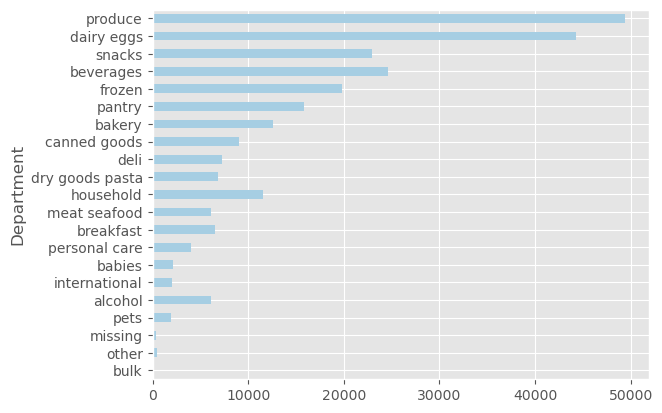

In [199]:
# Add a new column to the dataframe containing the sum of orders per income bracket
ct_prods_income['total'] = ct_prods_income.sum(axis=1)

# Sort the dataframe by the values in the 'total' column in descending order
ct_prods_income = ct_prods_income.sort_values(by='total', ascending=True)

# Remove the 'total' column to avoid it being included in the plot
ct_prods_income = ct_prods_income.drop(columns=['total'])

# Plot the chart
ct_prods_income['High Income'].plot(kind='barh')

<AxesSubplot:ylabel='Department'>

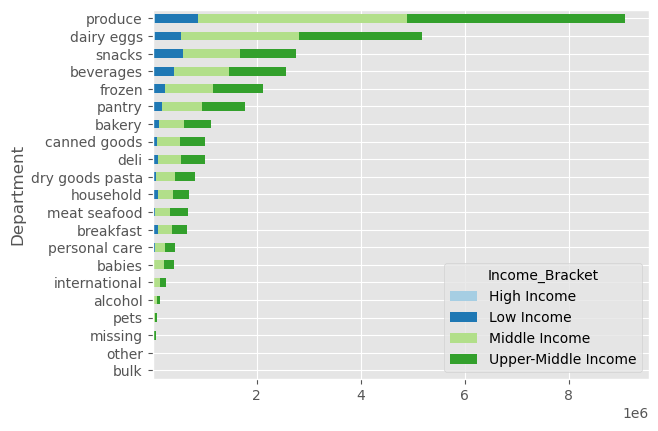

In [200]:
# Add a new column to the dataframe containing the sum of orders per income bracket
ct_prods_income['total'] = ct_prods_income.sum(axis=1)

# Sort the dataframe by the values in the 'total' column in descending order
ct_prods_income = ct_prods_income.sort_values(by='total', ascending=True)

# Remove the 'total' column to avoid it being included in the plot
ct_prods_income = ct_prods_income.drop(columns=['total'])

# Plot the chart
ct_prods_income.plot(kind='barh', stacked=True)

High Income customers order more 'Household', 'Beverages', 'Alcohol' products than other income groups